## Portfolio of Practical work - Part 1, the Strategy Pattern

### Context and Task

### Part 1

Most data science projects start by pre-processing a dataset to ensure the data is ready to use for its intended purpose. One of the tasks that a datascientist would typically complete during such a pre-processing phase is to replace missing data values in the dataset using a process known as imputation. A popular toolkit that assist with this task in python is class sklearn.preprocessing.Imputer. 
A discussion of this class and its properties and methods can be found at http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.preprocessing.Imputer.html . 

You are required to design and implement your own version of class Imputer. Your version should make use of the **strategy pattern** to ensure it is extensible and easy to maintain. 

### Specifications
#### Initial Parameters
Your class Imputer should (initially) accept  should accept two parameters, namely strategy and axis with the following options: 

**strategy** : string, optional (default=”mean”).
The imputation strategy.
-	If “mean”, then replace missing values using the mean along the axis. 
-	If “median”, then replace missing values using the median along the axis.
-	If “mode”, then replace missing using the most frequent value along the axis.
Important: It should be possible to add an additional strategy without affecting any of the existing strategy implementations.

**axis** : integer, optional (default=0) 
The axis along which to impute.
-	If axis=0, then impute along columns.
-	If axis=1, then impute along rows. (Not to be implemented now)
Note: Initially **we will only impute along columns as the axis you DO NOT need to write any code for dealing with the axis = 1**. 


#### Methods
Your class should support two methods, namely fit and transform with the following behaviours:

#### fit : *fit(X)*
- fit the imputer on X.

Parameters:	
- X : {array-like, sparse matrix}, shape (n_samples, n_features)
- Input data, where n_samples is the number of samples and n_features is the number of features.

Returns:	
- self : object
- Returns self.

In other words: Fit receives as input the "matrix" of incomplete data, with the "boundaries" of the area for which we want to impute (calculate) missing values. (i.e. a single column, or the entire matrix) and returns an object containing only the part we want to do the imputation on. 


#### transform : *transform(X)*
- Impute all missing values in X and returns X with new values.

Parameters:	
- X : {array-like, sparse matrix}, shape = [n_samples, n_features]
- The input data to complete.

#### Your imputer should work as follows:
Firstly, the user should create an instance of the imputer (see example cpommand below). In this case the parameters indicate that the imputation strategy should calculate the mean of the values in each column and replace missing values with the calculated mean. You may assume missing values will always be indicated by the word ‘nan’. **(Note: The axis = 0 parameter shown in the example here is not a current requirement.It indicates that the imputation should be by columns. Your version should not have this parameter at all). ** 
 
 ![title](imput1.png)
Secondly, the user needs to “fit” the imputation to the dataset. This means the user needs to tell the class which rows and columns must be included in the imputation. The statement below specifies that all rows and columns 1 to 3 should be included. You may simplify the syntax your class expects, but it must be documented clearly.
 ![title](imput2.png)

Lastly, the user will invoke the transform method. Transform returns a copy of the input data that has now been imputed.
  ![title](imput3.png)

Example of data before imputation
 ![title](imput4.png)
 
Example of data after imputation
 ![title](imput5.png)
 

## Imputer Classes

In [1]:
# CODE YOUR IMPLEMENTATION OF IMPUTER CLASSES HERE
# Import necessary libraries.
from abc import ABC, abstractmethod   #  Define abstract classes and abstract methods.
import numpy as np                      # np Support for arrays, matrices and mathematical function.
from sklearn.impute import SimpleImputer # Handling missing values in dataset.

# Define the Strategy Interface

class Imput_Strategy(ABC):
    @abstractmethod                    #a decorator used to method within an abstract base class.
    def fit(self, data):                #the abstract method should fit the provided data and implicate computing and storing statistics
        pass

    @abstractmethod 
    def transform(self, data):          # The abstract method confirms all imputation strategies for fitting and transforming data.
        pass

# Implement Concrete Strategies using SimpleImputer
# concrete strategy used to fit and transform the data as needed is adjustable 
# and allows for easy extension to add a new imputation strategy in the future, 
# creating a new class that executes Imput_Strategy without adjusting the existing classes.



class Mean_Impute(Imput_Strategy):
    def __init__(self):
        self.imputer = SimpleImputer(strategy='mean')
    
    def fit(self, data):
        self.imputer.fit(data)

    def transform(self, data):
        return self.imputer.transform(data)

class Median_Imput(Imput_Strategy):
    def __init__(self):
        self.imputer = SimpleImputer(strategy='median')

    def fit(self, data):
        self.imputer.fit(data)

    def transform(self, data):
        return self.imputer.transform(data)

class Mode_Imput(Imput_Strategy):
    def __init__(self):
        self.imputer = SimpleImputer(strategy='most_frequent')

    def fit(self, data):
        self.imputer.fit(data)

    def transform(self, data):
        return self.imputer.transform(data)






# Implement the Imputer Context with  strategy
#The Imputer class authorizes a clean and easy way to achieve imputation using different strategies that can be established at runtime.
class Imputer:
    def __init__(self, strategy_type):
        if strategy_type == "mean":
            self.strategy = Mean_Impute()

        elif strategy_type == "median":
            self.strategy = Median_Imput()

        elif strategy_type == "mode":
            self.strategy = Mode_Imput()
        else:
            raise ValueError("Invalid strategy type")

    def fit(self, X):
        self.strategy.fit(X)
        return self

    def transform(self, X):
        return self.strategy.transform(X)


ModuleNotFoundError: No module named 'numpy'

## Example of use

In [ ]:
# array with the country names and numerical data
data = np.array([
    ['France', 44.0, 72000.0],
    ['Spain', 27.0, 48000.0],
    ['Germany', 30.0, 54000.0],
    ['Spain', 38.0, 61000.0],
    ['Germany', 40.0, np.nan],
    ['France', 35.0, 58000.0],
    ['Spain', np.nan, 52000.0],
    ['France', 48.0, 79000.0],
    ['Germany', 50.0, 83000.0],
    ['France', 37.0, 67000.0]
], dtype=object)



# Separate numerical and categorical columns
Country_name_data = data[:, 0]    # Taking the first column as categorical
numbers_data = data[:, 1:3].astype(float)   # Taking the rest as numerical and converting to float

# Client
# Create an imputer with the strategy
imputer = Imputer('mode')


# Fit and transform the numerical data
imputer.fit(numbers_data)
imputed_numerical_data = imputer.transform(numbers_data)


# Combine the imputed numerical data with the categorical data
imputed_data = np.column_stack((Country_name_data, imputed_numerical_data))
print(imputed_data)






[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 48000.0]
 ['France' 35.0 58000.0]
 ['Spain' 27.0 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


### Part 2

**The strategy pattern** is a design pattern that allows an object to change its behavior by encapsulating an algorithm inside a class. This pattern helps select algorithms at runtime. Illustrated in the context of data imputation strategies for handling missing dataset values.

The components of  implementation include:

**Strategy Interface** `(Imput_Strategy)`: 
This abstract class describes a standard interface for all supported algorithms (or strategies). It uses the abstract method decorator, providing that all concrete strategy classes implement the fit and transform methods.


**Concrete Strategies** `(Mean_Impute, Median_Imput, Mode_Imput)`: These classes implement the strategy interface and provide specific algorithms for data imputation.

The class operates SimpleImputer from "sklearn.impute" with different strategies `('mean,' 'median,' 'most_frequent')`. The flexibility of the strategy pattern and the new imputation methods can be easily added by creating new strategy classes.

**Context (Imputer)**: The context class is configured with a concrete strategy object and a reference to a strategy object. It commissioned the work for the strategy object instead of implementing multiple algorithm versions. The Imputer class allows users to select the type of imputation strategy `('mean,' 'median,' 'mode')` at runtime.

The strategy pattern in the implementation provides solutions for handling multiple imputation algorithms, making the code more maintainable and adaptable to different data processing needs.

## Portfolio of Practical work - Part 2, the Factory Pattern

### Context

One possible problem with the use of the strategy pattern is the reliance on the client to compose the used object with the correct "strategy class" to ensure the required behaviour. The previous specification for Part 1 of this task already required the use of a parameter (for example "strategy = 'mean'") to determine which strategy the class should be composed with. However, this leaves the code to instantiate with a specific strategy inside your imputer class. Ideally we want to keep the imputer open for extension but closed for modification.
From a software usage point of view, it would be more convenient, and less error prone, to simply specify the behaviour that would be desirable as a parameter and have an external "factory" take care of the instantiation.

### Task

Your task consist of thrree parts, the first two are short written discussions (you may use diagrams as part of the discussions).

1. Explain how you can use a factory to take care of the strategy instantiation. This explanation should take the form of a discussion of the suggested design for the overall collection of classes for the imputer and any clients that will use it.
2. Discuss the benefits and/or negatives of the above design
3. Provide all the code for the suggested design. Including new versions for any classes you already wrote in part 1 of the protfolio assignment. Also add code to showcase how the classes work



## Suggested Design

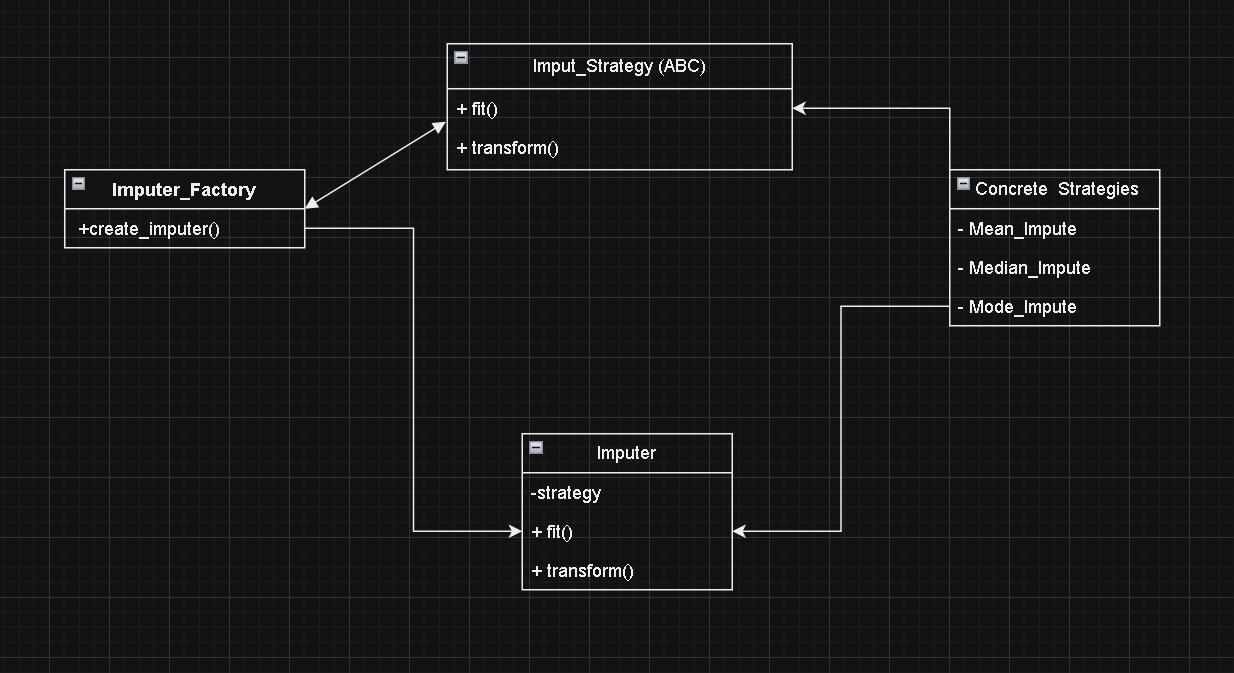

Design Overview:
The design includes several components that work together to deal with imputation strategies.
Including:
The Strategy Interface `(Imput_Strategy)`,
Concrete Strategy Classes `(Mean_Impute, Median_Impute, and Mode_Impute)`,
the Imputer Context Class `(Imputer)`,
and the new Strategy Factory `(Imputer_Factory)`.


The Strategy Interface `(Imput_Strategy)` remains unchanged, is the main unified interface for all imputation strategies, and ensures the consistency of different strategies.

The concrete strategy classes remain unchanged, and each class implements the Imput_Strategy interface and represents a specific imputation strategy.

There is a change in the Imputer Context Class `(Imputer)` instead of creating strategies directly, they now contain a reference to the object. The Imputer class delegated the fit and transform operations to its reference strategy object.

A new class, the Strategy Factory `(Imputer_Factory)`, operates by encapsulating the logic of creating strategy objects. This factory class has a method 'strategy_type' that tolerates parameters like 'mean,' 'median,' or 'mode' and returns a representative of the related strategy class.

Client Usage:
Clients interact with the simplified Imputer class by supplying their preferred imputation strategy as a parameter. The Imputer class then operates the `(Imputer_Factory)` to acquire the fitting strategy object founded on this parameter. This design approach allows for easy extension by adding new strategies without impacting existing code while keeping modifications to the closed implementation of the Imputer class minimal.

## Pros and Cons of Design
Your discussion goes here

Pros:

**Encapsulation**: The logic behind developing strategy instances is that the creation process becomes more centralized and manageable.

**Open/Closed Principle**: Adding new strategies to the design is possible without changing the existing code. Although it is available for extension, the {Imputer} class is still closed for change.

**Reduces Client Complexity**: The client code does not have to be aware of the specifics of how the strategies are instantiated. The customer merely needs to indicate the kind of strategy they require, which makes interacting with the strategies easier.



Cons:
**Increased Number of Classes**: The pattern adds more classes, which might be overkill in some situations and increase the complexity of the software.

**Pattern Proliferation**: Occasionally, including one pattern may prompt the development of additional ones to support the original design decision. This can result in an excessively complicated design architecture and pattern proliferation.




In [ ]:
# Import necessary libraries
from abc import ABC, abstractmethod
import numpy as np
from sklearn.impute import SimpleImputer

# Define the Strategy Interface
class Impute_Strategy(ABC):
    @abstractmethod
    def fit(self, data):
        pass

    @abstractmethod
    def transform(self, data):
        pass



# Implement Concrete Strategies using SimpleImputer
class Mean_Impute(Impute_Strategy):
    def __init__(self):
        self.imputer = SimpleImputer(strategy='mean')

    def fit(self, data):
        self.imputer.fit(data)

    def transform(self, data):
        return self.imputer.transform(data)

class Median_Impute(Impute_Strategy):
    def __init__(self):
        self.imputer = SimpleImputer(strategy='median')

    def fit(self, data):
        self.imputer.fit(data)

    def transform(self, data):
        return self.imputer.transform(data)

class Mode_Impute(Impute_Strategy):
    def __init__(self):
        self.imputer = SimpleImputer(strategy='most_frequent')

    def fit(self, data):
        self.imputer.fit(data)

    def transform(self, data):
        return self.imputer.transform(data)



# Implement the Imputer Factory
#By splitting the strategy into a factory and encapsulating the strategy within specific strategy classes,
# code is more maintainable, adaptable, and adheres to the open/closed principle,
# which means it can add new strategies or change existing ones without adjusting the code that is used.

class Imputer_Factory:

    @staticmethod
    def create_strategy(strategy_type):
        if strategy_type == "mean":
            return Mean_Impute()

        elif strategy_type == "median":
            return Median_Impute()

        elif strategy_type == "mode":
            return Mode_Impute()
        else:
            raise ValueError("Invalid strategy type")



# Implement the Imputer Context
class Imputer:
    def __init__(self, strategy):
        self.strategy = strategy

    def fit(self, X):
        self.strategy.fit(X)
        return self

    def transform(self, X):
        return self.strategy.transform(X)



# array with the country names and numerical data
data = np.array([
    ['France', 44.0, 72000.0],
    ['Spain', 27.0, 48000.0],
    ['Germany', 30.0, 54000.0],
    ['Spain', 38.0, 61000.0],
    ['Germany', 40.0, np.nan],
    ['France', 35.0, 58000.0],
    ['Spain', np.nan, 52000.0],
    ['France', 48.0, 79000.0],
    ['Germany', 50.0, 83000.0],
    ['France', 37.0, 67000.0]
], dtype=object)



# Separate numerical and categorical columns
Country_name_data = data[:, 0]    # Taking only the first column as categorical
numbers_data = data[:, 1:3].astype(float)   # Taking the rest as numerical and converting to float

# Create a strategy using the factory
strategy = Imputer_Factory.create_strategy("mean")

# Create an imputer with the strategy
imputer = Imputer(strategy)

# Fit and transform the numerical data
imputer.fit(numbers_data)
imputed_numerical_data = imputer.transform(numbers_data)

# Combine the imputed numerical data with the categorical data
imputed_data = np.column_stack((Country_name_data, imputed_numerical_data))
print(imputed_data)


[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
